In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [2]:
class BMIState(TypedDict):

    height_m : float 
    weight_kg : float
    bmi : float
    verdict : str

In [6]:
def calculate_bmi(state : BMIState)->BMIState:

    weight=state['weight_kg']
    height=state['height_m']

    bmi = weight/(height**2)

    state['bmi']=round(bmi,2)

    return state

def add_label(state:BMIState)->BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["verdict"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["verdict"] = "Normal"
    elif 25 <= bmi < 30:
        state["verdict"] = "Overweight"
    else:
        state["verdict"] = "Obese"

    return state


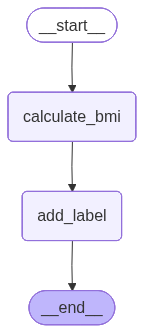

In [7]:
graph=StateGraph(BMIState)

graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('add_label',add_label)

graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','add_label')
graph.add_edge('add_label',END)

workflow=graph.compile()

workflow

In [8]:
initial_state={'height_m':1.72,'weight_kg':85}

final_state=workflow.invoke(initial_state)

final_state

{'height_m': 1.72, 'weight_kg': 85, 'bmi': 28.73, 'verdict': 'Overweight'}